In [ ]:
cd /content/drive/MyDrive/ImageClassification

/content/drive/MyDrive/ImageClassification


In [ ]:
import os
from PIL import Image
import numpy as np
import keras
import os
import cv2
from matplotlib import pyplot as plt
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.xception import Xception
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet121

from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications.vgg16 import decode_predictions
import tensorflow as tf
from tensorflow.python.keras import layers
from tensorflow.python.keras import models
import random



vggModel = VGG16(weights='imagenet', include_top=False)
resModel = ResNet50(weights='imagenet',include_top=False)
xceptionModel = Xception(weights='imagenet',include_top=False)
mobilenetModel = MobileNetV2(weights='imagenet',include_top=False)
inceptionModel = InceptionV3(weights='imagenet',include_top=False)
densenetModel = DenseNet121(weights='imagenet',include_top=False)

model = resModel

X = []
Y = []
classCount = 0

base_path='./dataset'

source_path=base_path
for child in os.listdir(source_path):
    classCount +=1
    print(child)
    sub_path = os.path.join(source_path, child)
    if os.path.isdir(sub_path):
        for data_file in os.listdir(sub_path):
            Qry = Image.open(os.path.join(sub_path, data_file))
            Qry = Qry.convert("RGB")
            Qry = np.array(Qry.resize((224,224)))
            Qry = Qry.reshape([-1,224,224,3])
            feature=(model.predict([Qry])).flatten()
            #print(feature_set)
            X.append(feature)
            Y.append(child)
    
#print(X)
#print(Y)
print('No of classes : ',classCount)


29097984/29084464 [==============================] - 0s 0us/step
melon
lemon
No of classes :  2


In [10]:
print(np.shape(X))
print(np.shape(Y))

(42, 100352)
(42,)


In [11]:
from sklearn.ensemble import ExtraTreesClassifier         #for feature selection - 'ExtraTreesClassifier' 
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, Y)
model = SelectFromModel(clf, prefit=True)
X = model.transform(X)

print(np.shape(X))
print(np.shape(Y))

(42, 244)
(42,)


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()
y = encoder.fit_transform(Y)
print(y)        
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), 
                                                    test_size=0.3, random_state=42)

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


dnnModel=models.Sequential()
dnnModel.add(layers.Dense(10000,activation="relu",input_shape=(np.shape(X)[1],)))
dnnModel.add(layers.Dense(5000,activation="relu"))
dnnModel.add(layers.Dense(2000,activation="relu"))
dnnModel.add(layers.Dense(500,activation="relu"))
dnnModel.add(layers.Dense(300,activation="relu"))
dnnModel.add(layers.Dense(200,activation="relu"))
dnnModel.add(layers.Dense(120,activation="relu"))
dnnModel.add(layers.Dense(30,activation="relu"))
dnnModel.add(layers.Dense(30,activation="relu"))
dnnModel.add(layers.Dense(1,activation="sigmoid"))
dnnModel.summary()


dnnModel.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


dnnModel.fit(X_train,y_train,epochs=25,batch_size=4)

testloss, testAccuracy=dnnModel.evaluate(X_test,y_test)

print(testAccuracy)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10000)             2450000   
_________________________________________________________________
dense_1 (Dense)              (None, 5000)              50005000  
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              10002000  
_________________________________________________________________
dense_3 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_4 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_5 (Dense)              (None, 200)               60200     
___________________________________

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix

Accuracy: 1.00 (+/- 0.00) [Logistic Regression]
Accuracy: 0.98 (+/- 0.02) [Random Forest]
Accuracy: 0.98 (+/- 0.02) [Naive Bayes]
Accuracy: 1.00 (+/- 0.00) [SVM]
Accuracy: 1.00 (+/- 0.00) [Ensemble]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


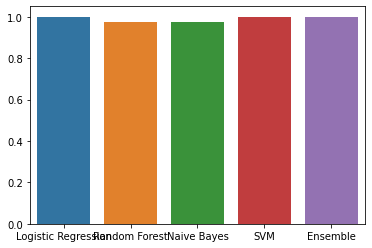

In [14]:

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
clf4 = SVC()

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('svm', clf4)],
    voting='hard')

acc=[]
for clf, label in zip([clf1, clf2, clf3,clf4, eclf], ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM','Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=2)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    acc.append(scores.mean())
sns.barplot(['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM','Ensemble'],acc)

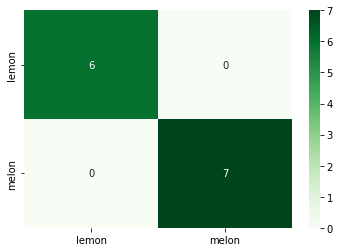

In [15]:
clf1.fit(X_train,y_train)
cm = confusion_matrix(y_test,clf1.predict(X_test))
sns.heatmap(cm,annot=True,xticklabels=encoder.inverse_transform([0,1]),yticklabels=encoder.inverse_transform([0,1]),cmap='Greens')

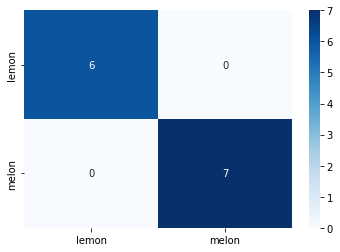

In [16]:
clf2.fit(X_train,y_train)
cm = confusion_matrix(y_test,clf2.predict(X_test))
sns.heatmap(cm,annot=True,xticklabels=encoder.inverse_transform([0,1]),yticklabels=encoder.inverse_transform([0,1]),cmap='Blues')

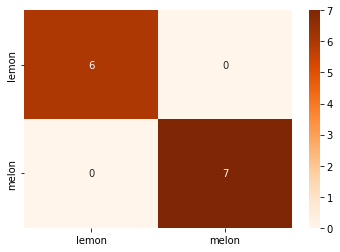

In [17]:
clf3.fit(X_train,y_train)
cm = confusion_matrix(y_test,clf3.predict(X_test))
sns.heatmap(cm,annot=True,xticklabels=encoder.inverse_transform([0,1]),yticklabels=encoder.inverse_transform([0,1]),cmap='Oranges')

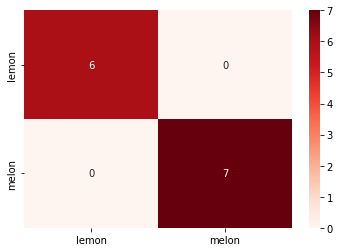

In [18]:
clf4.fit(X_train,y_train)
cm = confusion_matrix(y_test,clf4.predict(X_test))
sns.heatmap(cm,annot=True,xticklabels=encoder.inverse_transform([0,1]),yticklabels=encoder.inverse_transform([0,1]), cmap='Reds')

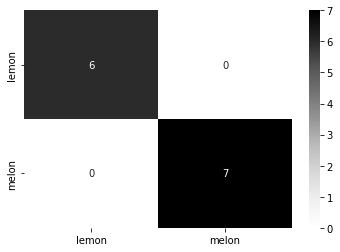

In [19]:
eclf.fit(X_train,y_train)
cm = confusion_matrix(y_test,eclf.predict(X_test))
sns.heatmap(cm,annot=True,xticklabels=encoder.inverse_transform([0,1]),yticklabels=encoder.inverse_transform([0,1]),cmap='Greys')